# Interlocking analysis for Assemblies of possibly non convex Polyhedra

In [3]:
using Plots

include("../Polyhedron.jl")

plot_polyhedron! (generic function with 1 method)

In [4]:
verts = [[1,0,0], [0,1,0], [0,0,1]]
edges = [(1,2), (2,3), (3,1)]
facets = [[1,2,3]]

standard_simplex = Polyhedron(verts, edges, facets)

Polyhedron(Vector{Float32}[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], [(1, 2), (2, 3), (3, 1)], [[1, 2, 3]])

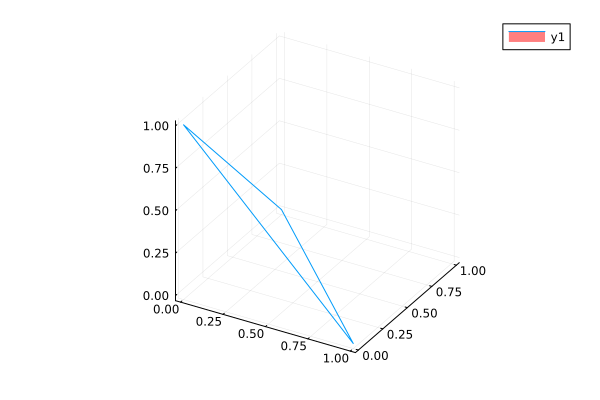

In [5]:
p = plot()

plot_polyhedron!(p, standard_simplex)
display(p)